# Charts // Functional Ocean Metagenomes

```
Dustin Michels
10 Nov 2017
```

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import parallel_coordinates

In [2]:
data_path = '../data/'
go_data_path = '../data/go_downloads/'

## Load Metadata DataFrame

In [3]:
# Get and clean project meta data
meta_df = pd.read_csv("../data/project_metadata_functional.csv")
meta_df.columns = meta_df.columns.str.lower()
meta_df.columns = meta_df.columns.str.replace(' ', '_')
meta_df['region'] = meta_df['region'].astype('category')
meta_df['sample_details'] = meta_df['sample_details'].astype('category')
meta_df.drop(
    ['downloaded','link_to_info', 'student'],
    axis=1, inplace=True)

In [4]:
# View first 3 entries
# meta_df.head(n=3)

## Load GO data for Each Sample; Merge Together

In [5]:
# Helper function for getting GO annotations into DataFrames

def get_df(idx):
    """Make df given index for meta_df"""
    filenames = meta_df['filename']
    names = ['id', 'name', 'namespace', 'read_count']
    df = pd.read_csv(
        f"{go_data_path}{filenames[idx]}", header=None,
        names=names)
    
    df.insert(0, 'run_id', meta_df['run_id'][idx])
    df.insert(1, 'region', meta_df['region'][idx])
    df.insert(2, 'zone', meta_df['sample_details'][idx])
    
    read_sum = df['read_count'].sum()
    df['read_percent'] = (df['read_count']/read_sum)

    df = df.iloc[:8, :]
    return df

In [6]:
# Get GO annotation df for each sample, merge them together
df = get_df(0)
for i in range(1, len(meta_df)):
    new_df = get_df(i)
    df = pd.concat([df, new_df])

In [7]:
# View head and tail of DataFrame
# display(df.head())
# display(df.tail())

## Make Parallel Coordinate Plots

### All Samples, Colored by Zone

In [8]:
data = df.pivot_table(index=['run_id','zone'], columns='name')
data = data.reset_index(col_level=1)
data.drop('read_count', axis=1, level=0, inplace=True)
data.columns = data.columns.droplevel(0)
data.drop('run_id', axis=1, inplace=True)
data.head()

name,zone,biosynthetic process,carbohydrate metabolic process,metabolic process,oxidation-reduction process,proteolysis,tRNA aminoacylation for protein translation,translation,transport
0,deep chlorophyll maximum layer,0.012449,0.009573,0.039142,0.059029,0.008563,0.009564,0.010408,0.015223
1,mesopelagic zone,0.011707,0.008987,0.044429,0.064430,0.007893,0.009156,0.009796,0.014267
2,surface water layer,0.012785,0.009623,0.038691,0.057507,0.008689,0.009905,0.011214,0.014048
3,deep chlorophyll maximum layer,0.013339,0.010523,0.037969,0.059124,0.008915,0.009595,0.010453,0.012943
4,mesopelagic zone,0.011954,0.009355,0.043506,0.061891,0.007935,0.009164,0.010237,0.014694


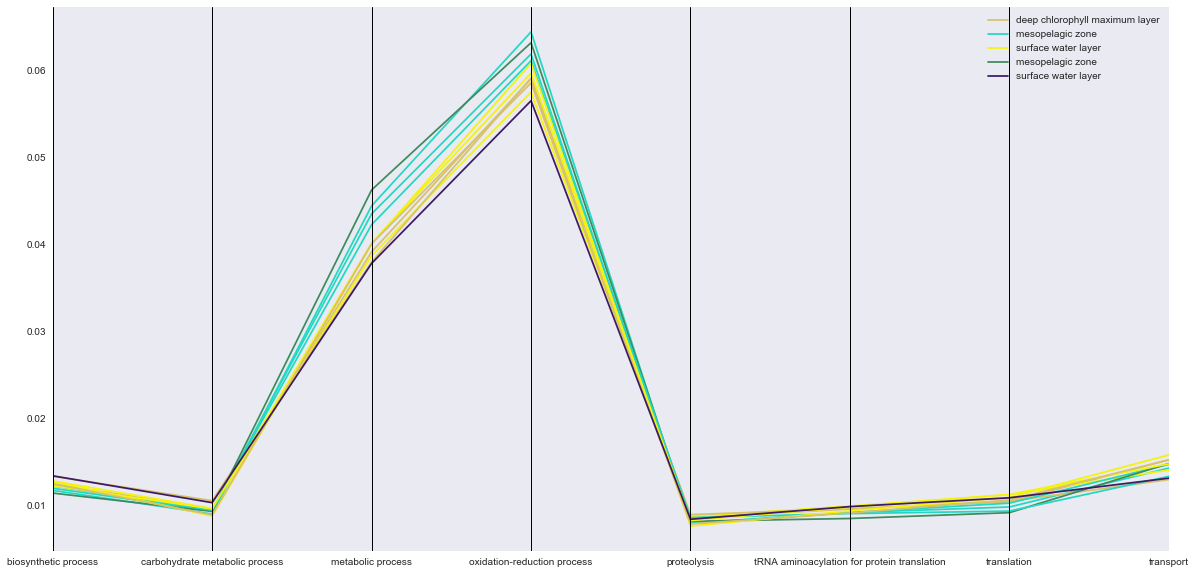

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax = parallel_coordinates(data, class_column='zone')
fig.savefig('parCo_all.png', bbox_inches='tight', dpi=300)

### By Depth

In [10]:
data = df.pivot_table(index='zone', columns='name', aggfunc={'read_percent':'mean'})
data.reset_index(col_level=1, inplace=True)
data.columns = data.columns.droplevel(0)
data.columns.name = None

In [11]:
data

,zone,biosynthetic process,carbohydrate metabolic process,metabolic process,oxidation-reduction process,proteolysis,tRNA aminoacylation for protein translation,translation,transport
0,deep chlorophyll maximum layer,0.012747,0.009659,0.039059,0.058908,0.008442,0.009422,0.010489,0.014460
1,mesopelagic zone,0.011961,0.009255,0.043402,0.062477,0.008137,0.009120,0.009786,0.014093
2,mesopelagic zone,0.011395,0.009292,0.046258,0.063189,0.008150,0.008473,0.009143,0.014790
3,surface water layer,0.012584,0.009327,0.039625,0.059338,0.008175,0.009680,0.011114,0.014857
4,surface water layer,0.013378,0.010296,0.037812,0.056513,0.008385,0.009840,0.010854,0.013110


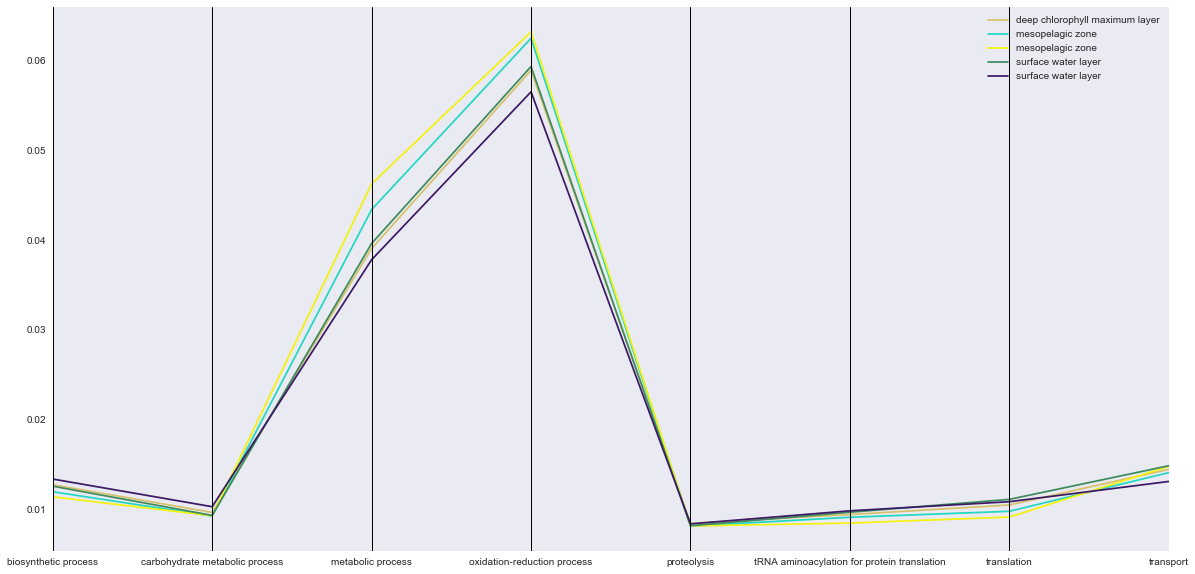

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax = parallel_coordinates(data, class_column='zone')
fig.savefig('parCo_zone.png', bbox_inches='tight', dpi=300)

## Make Heat Maps

In [13]:
# rearrange relevent data
data = df.pivot(index='name', columns='run_id', values='read_percent')
display(data)

run_id,ERR598948,ERR598980,ERR598992,ERR598995,ERR598999,ERR599008,ERR599031,ERR599078,ERR599090,ERR599104,ERR599142
name,,,,,,,,,,,
biosynthetic process,0.012449,0.011707,0.012785,0.013339,0.011954,0.011395,0.012222,0.012234,0.012732,0.012452,0.013378
carbohydrate metabolic process,0.009573,0.008987,0.009623,0.010523,0.009355,0.009292,0.009423,0.009586,0.008771,0.008881,0.010296
metabolic process,0.039142,0.044429,0.038691,0.037969,0.043506,0.046258,0.042270,0.040133,0.040050,0.040067,0.037812
oxidation-reduction process,0.059029,0.064430,0.057507,0.059124,0.061891,0.063189,0.061112,0.059681,0.060826,0.058572,0.056513
proteolysis,0.008563,0.007893,0.008689,0.008915,0.007935,0.008150,0.008583,0.008235,0.007600,0.007846,0.008385
tRNA aminoacylation for protein translation,0.009564,0.009156,0.009905,0.009595,0.009164,0.008473,0.009039,0.009788,0.009348,0.009108,0.009840
translation,0.010408,0.009796,0.011214,0.010453,0.010237,0.009143,0.009324,0.011235,0.010893,0.010606,0.010854
transport,0.015223,0.014267,0.014048,0.012943,0.014694,0.014790,0.013317,0.014743,0.015781,0.015215,0.013110


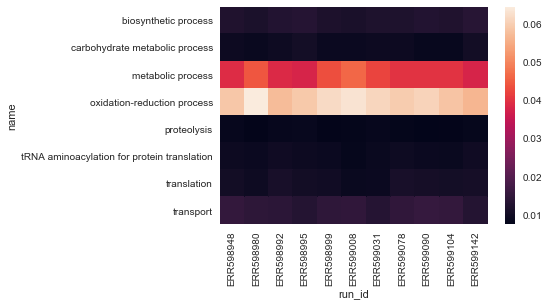

In [14]:
# Make plot
fig, ax = plt.subplots()
sns.heatmap(ax=ax, data=data)
fig.savefig('heat_all.png', bbox_inches='tight', dpi=300)

### By Region

In [15]:
# Rearrange data; summing regions together
data = df.pivot_table(index='name', columns='region', aggfunc={'read_percent':'mean'})
data.columns = data.columns.droplevel(0)
display(data)

region,Arabian Sea,North Atlantic (off the coast of Portugal),North Pacific,South Pacific (near the Marquesas),Southern Ocean (near Antarctica)
name,,,,,
biosynthetic process,0.012222,0.012234,0.012808,0.012396,0.012193
carbohydrate metabolic process,0.009423,0.009586,0.009935,0.009517,0.008981
metabolic process,0.042270,0.040133,0.040070,0.040447,0.042125
oxidation-reduction process,0.061112,0.059681,0.060022,0.059475,0.060862
proteolysis,0.008583,0.008235,0.008398,0.008396,0.007866
tRNA aminoacylation for protein translation,0.009039,0.009788,0.009530,0.009544,0.008976
translation,0.009324,0.011235,0.010367,0.010620,0.010214
transport,0.013317,0.014743,0.013440,0.014655,0.015262


NameError: name 'data' is not defined

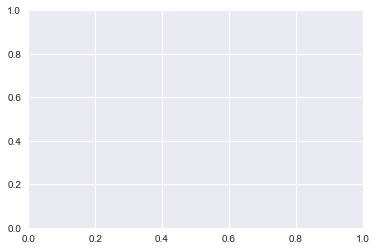

In [4]:
# Make plot
fig, ax = plt.subplots()
sns.heatmap(ax=ax, data=data)
fig.savefig('heat_by_region.png', bbox_inches='tight', dpi=300)

### By Zone

In [17]:
# Rearrange data; summing regions together
data = df.pivot_table(index='name', columns='zone', aggfunc={'read_percent':'mean'})
data.columns = data.columns.droplevel(0)
display(data)

zone,deep chlorophyll maximum layer,mesopelagic zone,mesopelagic zone,surface water layer,surface water layer
name,,,,,
biosynthetic process,0.012747,0.011961,0.011395,0.012584,0.013378
carbohydrate metabolic process,0.009659,0.009255,0.009292,0.009327,0.010296
metabolic process,0.039059,0.043402,0.046258,0.039625,0.037812
oxidation-reduction process,0.058908,0.062477,0.063189,0.059338,0.056513
proteolysis,0.008442,0.008137,0.008150,0.008175,0.008385
tRNA aminoacylation for protein translation,0.009422,0.009120,0.008473,0.009680,0.009840
translation,0.010489,0.009786,0.009143,0.011114,0.010854
transport,0.014460,0.014093,0.014790,0.014857,0.013110


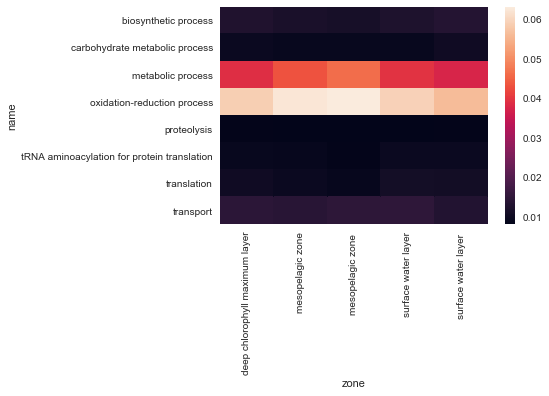

In [18]:
# Make plot
fig, ax = plt.subplots()
sns.heatmap(ax=ax, data=data)
fig.savefig('heat_by_zone.png', bbox_inches='tight', dpi=300)